In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! pip install seaborn

In [2]:
# Load Data

In [5]:
data = pd.read_csv(r"C:\Users\Inspiron\Downloads\IPL Matches 2008-2020.csv")

In [6]:
data.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [10]:
#drop the "method" feature
data.drop(['method'], axis =1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


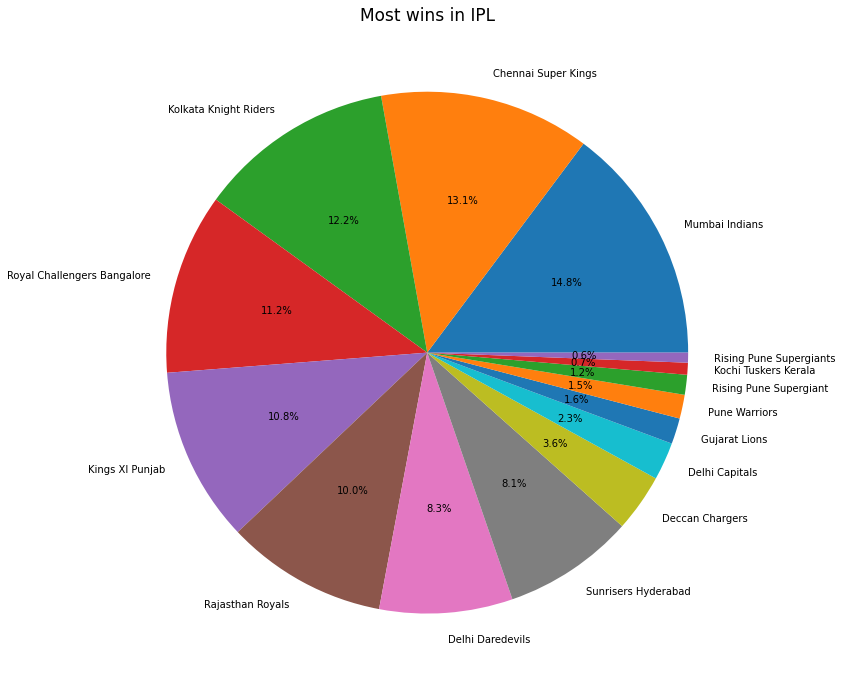

In [17]:
### Most wind in IPL
temp = pd.DataFrame({"winner":data['winner']})
count_wins = temp.value_counts()
#print(count_wins)
labels = [X[0] for X in count_wins.keys()]

bar,  ax =plt.subplots(figsize=(20, 12))
ax = plt.pie(x= count_wins, autopct = "%.1f%%", labels = labels)
plt.title("Most wins in IPL", fontsize = 17)
plt.show()

In [18]:
# Most wins in Eliminator

C:\Users\Inspiron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


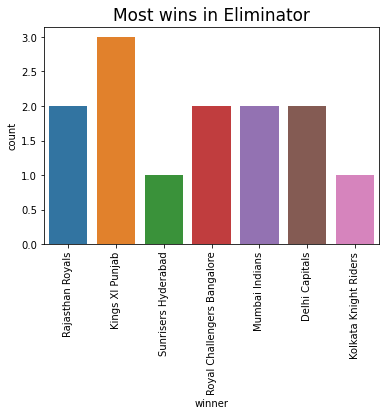

In [20]:
sns.countplot(data['winner'][data['eliminator']=='Y'], data=data)
plt.title("Most wins in Eliminator", fontsize = 17)
plt.xticks(rotation = 90)
plt.show()

In [22]:
### Toss Decision

In [55]:
teams = data['toss_winner'].unique()

decision_making = pd.DataFrame([], columns= ['Toss Winner', 'Decision', 'Times'])

for id, element in enumerate(teams):
    temp_bat = data[(data['toss_winner']== element) & (data['toss_decision'] == 'bat')]
    temp_field = data[(data['toss_winner']== element) & (data['toss_decision'] == 'field')]
    
    #append to decision_making
    decision_making = decision_making.append({'Toss winner': element,
                                             'Decision': 'bat', 'Times': temp_bat['toss_winner'].count()}, ignore_index= True)
    decision_making = decision_making.append({'Toss winner': element,
                                             'Decision': 'field', 'Times': temp_bat['toss_winner'].count()}, ignore_index= True)


In [49]:
decision_making

,Toss Winner,Decision,Times,Toss winner
0,NaN,bat,24,Royal Challengers Bangalore
1,NaN,fiels,24,Royal Challengers Bangalore
2,NaN,bat,51,Chennai Super Kings
3,NaN,fiels,51,Chennai Super Kings
4,NaN,bat,34,Rajasthan Royals
5,NaN,fiels,34,Rajasthan Royals
6,NaN,bat,48,Mumbai Indians
7,NaN,fiels,48,Mumbai Indians
8,NaN,bat,24,Deccan Chargers
9,NaN,fiels,24,Deccan Chargers


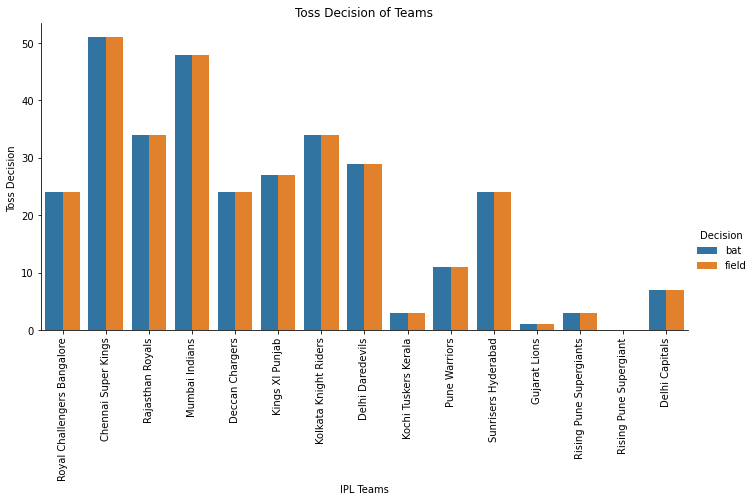

In [58]:
sns.catplot(x="Toss winner",y = 'Times', hue = "Decision" , data=decision_making, kind = 'bar', height = 5, aspect =2 )

plt.xticks(rotation = 90)
plt.title("Toss Decision of Teams")
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision ")
plt.show()

In [59]:
# famous venue

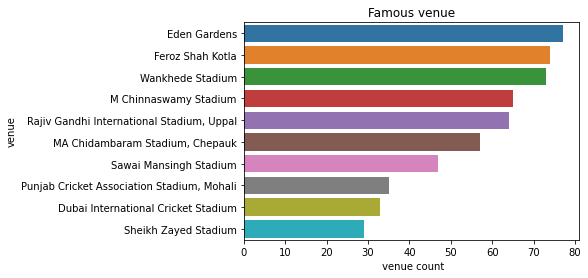

In [63]:
sns.barplot(x = data['venue'].value_counts().head(10).values,
            y = data['venue'].value_counts().head(10).index,
            data=data
           )
plt.title("Famous venue")
plt.xlabel(" venue count")
plt.ylabel("venue")
plt.show()

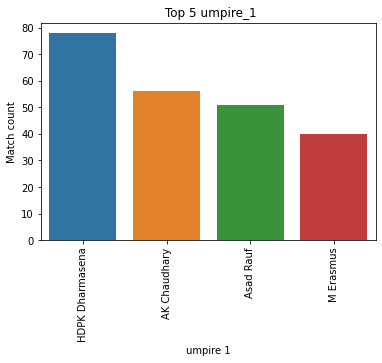

In [70]:
## Top 5 Umpire_1
sns.barplot(x= data['umpire1'].value_counts().head(4).index,
           y= data['umpire1'].value_counts().head(4).values,
          data=data
           )
plt.xticks(rotation = 90)
plt.xlabel("umpire 1")
plt.ylabel("Match count")
plt.title(" Top 5 umpire_1")
plt.show()


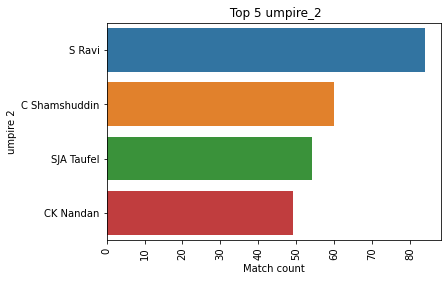

In [71]:
sns.barplot(x= data['umpire2'].value_counts().head(4).values,
           y= data['umpire2'].value_counts().head(4).index,
          data=data
           )
plt.xticks(rotation = 90)
plt.xlabel("Match count")
plt.ylabel("umpire 2")
plt.title(" Top 5 umpire_2")
plt.show()